### 📊 1. (Optional) Reading and Merging Geospatial Data for Regions
- **Objective**: Load geospatial data for various indicators across multiple regions in the Netherlands, then combine these into a unified national dataset.
- **Process**: Each indicator's data is read from regional files, concatenated into a single GeoDataFrame (`NL_gdf`), and saved as a new GeoPackage file. This enables comprehensive national-level analysis by unifying disparate regional data.
- **Importance**: Consolidating regional data facilitates efficient comparison and holistic assessment across the Netherlands, supporting informed decision-making in national policies and initiatives.

In [21]:
import geopandas as gpd
import pandas as pd
import os

indicators = ['crossroads', 'walkability', 'urbanization', 'car_ownership', 'children_household', 'age', 'education', 'public_transport', 'green_ideals', 'POIs']

for indicator in indicators:
    Drenthe_gdf = gpd.read_file(rf"output/{indicator}/{indicator}_Drenthe_28992.gpkg")
    Flevoland_gdf = gpd.read_file(rf"output/{indicator}/{indicator}_Flevoland_28992.gpkg")
    Friesland_gdf = gpd.read_file(rf"output/{indicator}/{indicator}_Friesland_28992.gpkg")
    Gelderland_gdf = gpd.read_file(rf"output/{indicator}/{indicator}_Gelderland_28992.gpkg")
    Limburg_gdf = gpd.read_file(rf"output/{indicator}/{indicator}_Limburg_28992.gpkg")
    NBrabant_gdf = gpd.read_file(rf"output/{indicator}/{indicator}_NBrabant_28992.gpkg")
    Overijssel_gdf = gpd.read_file(rf"output/{indicator}/{indicator}_Overijssel_28992.gpkg")
    Prov_Groningen_gdf = gpd.read_file(rf"output/{indicator}/{indicator}_Prov_Groningen_28992.gpkg")
    Prov_NHol_gdf = gpd.read_file(rf"output/{indicator}/{indicator}_Prov_NHol_28992.gpkg")
    Prov_Utrecht_gdf = gpd.read_file(rf"output/{indicator}/{indicator}_Prov_Utrecht_28992.gpkg")
    Zeeland_gdf = gpd.read_file(rf"output/{indicator}/{indicator}_Zeeland_28992.gpkg")
    ZHol_gdf = gpd.read_file(rf"output/{indicator}/{indicator}_ZHol_28992.gpkg")

    NL_gdf = pd.concat([Drenthe_gdf, Flevoland_gdf, Friesland_gdf, Gelderland_gdf, Limburg_gdf, NBrabant_gdf, Overijssel_gdf, Prov_Groningen_gdf, Prov_NHol_gdf, Prov_Utrecht_gdf, Zeeland_gdf,ZHol_gdf])
    output_file = rf"output/{indicator}/{indicator}_NL_28992.gpkg"

    if os.path.exists(output_file):
        os.remove(output_file)

    NL_gdf.to_file(output_file, layer=f"{indicator}", driver="GPKG", mode="a")

### ✂️ 2. Clipping and Normalizing Indicator Scores
- **Objective**: Apply a spatial mask to focus analysis on specific areas (e.g., municipalities or quarters), normalize scores for various indicators, and compute a composite score.
- **Process**: This block reads indicator data, potentially clips it to a specified area (e.g., "Amersfoort"), normalizes the data, and computes a total score to evaluate spatial dynamics comprehensively. Car ownership scores are further adjusted due to their inverse relationship with shared mobility potential.
- **Importance**: Focused analysis on specific geographies aids in understanding localized patterns and dynamics, while normalization ensures meaningful comparisons between different indicators.

walkability 16701 

urban 16711 

car_ownership 16711 

children_household 16711 

age 16711 

education 16711 

public_transport 16711 

green_ideals 16711 

POIs 16701 

                            geometry  sum_score    walkability  \
13353  POINT (201852.924 553200.421)   0.497369   48448.255561   
3077   POINT (169927.524 587292.164)   0.501736   68312.491674   
4612   POINT (174735.433 566676.733)   0.265850   77279.628065   
11878  POINT (196495.149 591155.421)  -0.521008    3360.571921   
6508   POINT (181746.754 579662.872)   3.046864  106950.300154   
7824   POINT (184051.985 552567.146)  -0.334165   25689.417678   
88     POINT (143486.836 596792.322)   1.228050   80129.128773   
7731   POINT (183315.751 580348.811)   2.570464  111979.172684   
6227   POINT (181509.043 580761.871)   2.101958   75712.015327   
10367   POINT (192434.13 593600.801)   0.356917   61757.780645   

       norm_walkability  urban  norm_urban  car_ownership  norm_car_ownership  \
13353         -0.203

Matplotlib is building the font cache; this may take a moment.


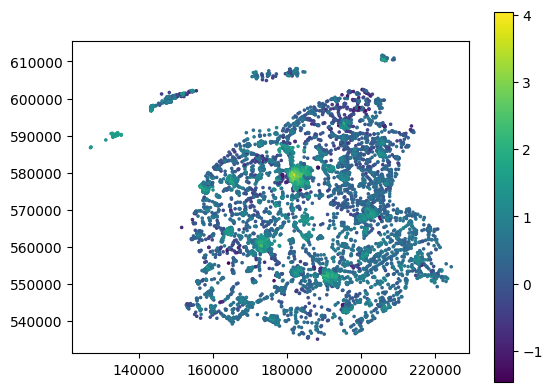

In [4]:
import geopandas as gpd
import pandas as pd
import os

def create_mask(clipping_level, clipping_name):
    if clipping_level == "gemeenten":
        clip_gdf = gpd.read_file(input_file_clipping, layer=clipping_level)
        clip_gdf = clip_gdf[clip_gdf['gemeentenaam'] == clipping_name]
    elif clipping_level == "wijken":
        clip_gdf = gpd.read_file(input_file_clipping, layer=clipping_level)
        clip_gdf = clip_gdf[clip_gdf['wijknaam'] == clipping_name]
    else:
        clip_gdf = pd.DataFrame({'A' : []})
    return clip_gdf

area_name = "Friesland"
coord_system = 28992 # Needs to be a system that has meters

input_files = {
'walkability' : rf"output/walkability/walkability_{area_name}_{coord_system}.gpkg",
'urban' : rf"output/urbanization/urbanization_{area_name}_{coord_system}.gpkg",
'car_ownership' : rf"output/car_ownership/car_ownership_{area_name}_{coord_system}.gpkg",
'children_household' : rf"output/children_household/children_household_{area_name}_{coord_system}.gpkg",
'age' : rf"output/age/age_{area_name}_{coord_system}.gpkg",
'education' : rf"output/education/education_{area_name}_{coord_system}.gpkg",
'public_transport' : rf"output/public_transport/public_transport_{area_name}_{coord_system}.gpkg",
'green_ideals' : rf"output/green_ideals/green_ideals_{area_name}_{coord_system}.gpkg",
'POIs' : rf"output/POIs/POIs_{area_name}_{coord_system}.gpkg"
}

input_file_crossroads = rf"output/crossroads/crossroads_{area_name}_{coord_system}.gpkg"
input_file_clipping = "sources/wijkenbuurten_2024_v1.gpkg"
output_file = rf"output/final_scores/final_scores_{area_name}_{coord_system}.gpkg"

crossroads_gdf = gpd.read_file(input_file_crossroads)

clipping_level = None #Municipality (gemeenten), Quarter (wijken) or None for no clipping
clipping_name = "Amersfoort"

clip_gdf = create_mask(clipping_level, clipping_name)

final_scores_gdf = crossroads_gdf.copy()
if clip_gdf.empty == False:
    final_scores_gdf = gpd.clip(final_scores_gdf, clip_gdf)
final_scores_gdf['sum_score'] = 0

for column_name, dataframe in input_files.items():
    indicator_gdf = gpd.read_file(dataframe)
    indicator_gdf[f'norm_{column_name}'] = (indicator_gdf[column_name] - indicator_gdf[column_name].mean()) / (indicator_gdf[column_name].max() - indicator_gdf[column_name].min())
    if column_name == 'car_ownership':
        indicator_gdf['norm_car_ownership'] = 1 - indicator_gdf['norm_car_ownership']
    final_scores_gdf = gpd.sjoin(final_scores_gdf, indicator_gdf, how='left')
    final_scores_gdf = final_scores_gdf.drop(columns=['index_right'])
    final_scores_gdf['sum_score'] = final_scores_gdf['sum_score'] + final_scores_gdf[f'norm_{column_name}']
    # Should be the same length
    print(column_name, len(indicator_gdf), '\n')

final_scores_gdf = final_scores_gdf.dropna()
print(final_scores_gdf.sample(10))
final_scores_gdf.plot(column='sum_score', markersize=2.5, legend=True)

if os.path.exists(output_file):
    os.remove(output_file)

final_scores_gdf.to_file(output_file, layer="final_scores", driver="GPKG", mode="a")


### 📱 3. Analyzing Spatial Relationships with App Usage Data
- **Objective**: Explore spatial correlations and relationships between geospatial indicator scores and real-world app usage data.
- **Process**: Nearest neighbor analysis finds app usage points close to crossroads, computes distances, and linear regression modeling reveals how various geospatial features influence these usage patterns.
- **Importance**: This analysis highlights practical effects of environmental factors (e.g., walkability, urbanization) on mobility behaviors, aiding the identification of effective policy and development strategies.

In [ ]:
import geopandas as gpd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LinearRegression

area_name = "ZHol"
coord_system = 28992  # Meters

input_file_final_score = rf"output/final_scores/final_scores_{area_name}_{coord_system}.gpkg"
input_file_app_usage = rf"<redacted>"
input_file_clipping = "sources/wijkenbuurten_2024_v1.gpkg"

final_score_gdf = gpd.read_file(input_file_final_score, layer='final_scores')
app_usage_gdf = gpd.read_file(input_file_app_usage, layer='<redacted>')

# Optional clipping
# clipping_level = "gemeenten"
# clipping_name = "Rotterdam"
# clip_gdf = create_mask(clipping_level, clipping_name)
input_file_clip = r"<redacted>"
clip_gdf = gpd.read_file(input_file_clip, layer='<redacted>')

if not clip_gdf.empty:
    final_score_gdf = gpd.clip(final_score_gdf, clip_gdf)
    print(f"Clipped to {clipping_name}")

# --- Prepare coordinates ---
final_score_coords = np.array([(geom.x, geom.y) for geom in final_score_gdf.geometry])
app_usage_coords = np.array([(geom.x, geom.y) for geom in app_usage_gdf.geometry])

# --- Find nearest 10 app usage points to each crossroad ---
nn = NearestNeighbors(n_neighbors=50, algorithm='ball_tree')
nn.fit(app_usage_coords)
distances, indices = nn.kneighbors(final_score_coords)

# --- Compute sum of distances to closest 10 usage points ---
final_score_gdf['sum_distances'] = distances.sum(axis=1)

# --- Linear regression: explain sum_distances using crossroad features ---
features = ['norm_walkability', 'norm_urban', 'norm_car_ownership', 
            'norm_age', 'norm_education',  'norm_green_ideals', 'norm_POIs']

X = final_score_gdf[features]
y = final_score_gdf['sum_distances']

model = LinearRegression().fit(X, y)

# --- Output results ---
weights = dict(zip(features, model.coef_))
intercept = model.intercept_
r_squared = model.score(X, y)


print("📊 Variables and coefficients:")
for variable, coefficient in weights.items():
    print(f"- {variable}: {coefficient:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R²: {r_squared:.4f}")

Clipped to Amersfoort
📊 Variables and coefficients:
- norm_walkability: -7132.0134
- norm_urban: -23353.3553
- norm_car_ownership: -8609.9399
- norm_age: -13044.5444
- norm_education: -4261.6007
- norm_green_ideals: -4583.6969
- norm_POIs: -4881.6860
Intercept: 34049.9484
R²: 0.4988


### 4. Statistical Analysis of Indicator Impact 📈
- **Objective**: Perform Ordinary Least Squares (OLS) regression to understand the statistical impact of normalized geospatial indicators on app usage distances.
- **Process**: The `statsmodels` library provides a detailed regression analysis, including coefficients, standard errors, and p-values, to evaluate how indicators influence objective outcomes.
- **Importance**: OLS regression offers insights into the statistical significance and strength of relationships between variables, supporting robust, data-driven policy and investment decisions.

In [10]:

import statsmodels.api as sm

# X: your features (already normalized), y: your target (sum of distances)
X = final_score_gdf[['norm_walkability', 'norm_urban', 'norm_car_ownership', 'norm_children_household',
            'norm_age', 'norm_education', 'norm_public_transport', 'norm_green_ideals', 'norm_POIs']]
X = sm.add_constant(X)  # Add intercept term
y = final_score_gdf['sum_distances']

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Show full summary with coefficients, std err, t-values, and p-values
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          sum_distances   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     230.1
Date:                Tue, 10 Jun 2025   Prob (F-statistic):          4.12e-304
Time:                        15:42:32   Log-Likelihood:                -21404.
No. Observations:                2084   AIC:                         4.283e+04
Df Residuals:                    2074   BIC:                         4.288e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

### 🔍 5. Visualizing Data Relationships with a Correlation Matrix
- **Objective**: Visualize correlations between different normalized geospatial indicators to understand their interdependencies and relationships.
- **Process**: The correlation matrix is generated using `seaborn` and `matplotlib`, highlighting statistical relationships between indicators through visual means.
- **Importance**: Visualization aids in identifying strong correlations that can drive strategic decision-making, highlighting potential areas for intervention or complementary policy approaches.

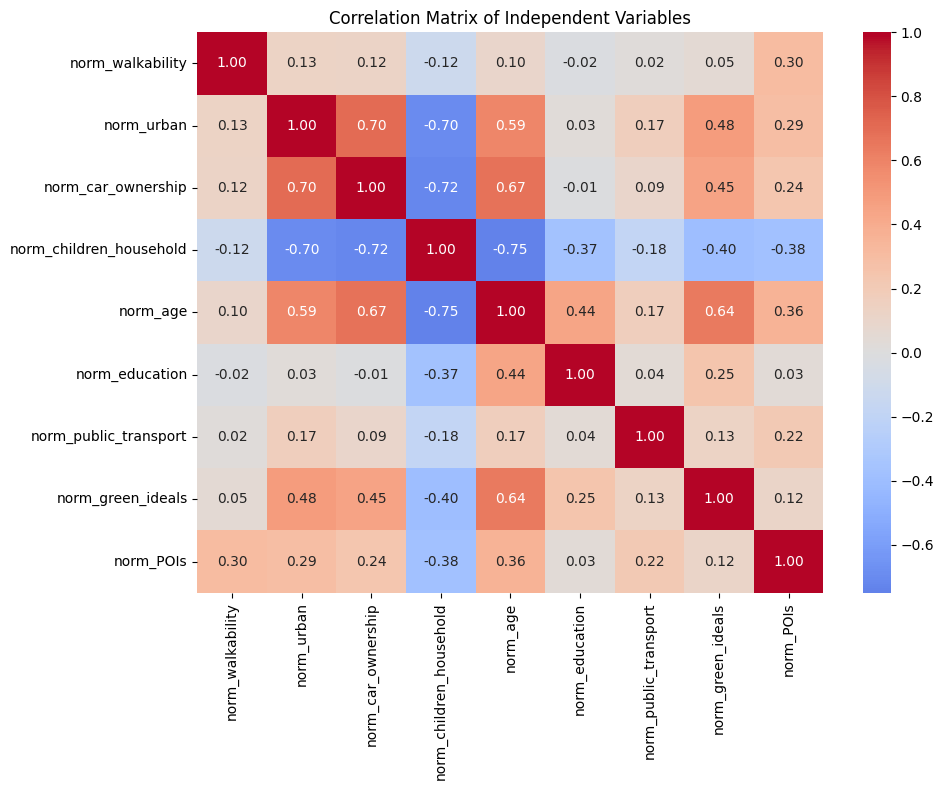

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

features = [
    'norm_walkability', 'norm_urban', 'norm_car_ownership',
    'norm_children_household', 'norm_age', 'norm_education',
    'norm_public_transport', 'norm_green_ideals', 'norm_POIs'
]

# Drop rows with missing values for these features
clean_data = final_score_gdf[features].dropna()

# Compute correlation
corr_matrix = clean_data.corr()

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    annot_kws={"size": 10}
)
plt.title("Correlation Matrix of Independent Variables")
plt.tight_layout()
plt.show()


### 6. Weighting and Visualizing the Final Scores 🏋️‍♂️
- **Objective**: Adjust the final scores of geospatial data using weighted coefficients based on their relative importance. Visualize the weighted scores to enhance understanding of their spatial distribution.
- **Process**:
  - **Load Data**: Read the previously calculated final scores stored in a GeoPackage file for analysis.
  - **Compute Weights**: Create a DataFrame from regression weights, normalizing the absolute values to derive a scale of importance.
  - **Apply Weights**: Iterate over the variables, adjusting each by its weight and summing these to calculate a new, weighted score for each location.
  - **Visualization**: Plot the weighted scores using GeoPandas to facilitate a quick visual overview of high-scoring locations.
  - **Save Results**: Store the weighted score results in a new GeoPackage file, ensuring the weighted analysis is retained for further use or sharing.
- **Importance**: Weighting scores based on relative influence allows for a better evaluation of locations for shared mobility services.

                     coefficient  coefficient_abs   weights
norm_walkability    -7132.013422      7132.013422  0.305396
norm_urban         -23353.355279     23353.355279  1.000000
norm_car_ownership  -8609.939936      8609.939936  0.368681
norm_age           -13044.544359     13044.544359  0.558573
norm_education      -4261.600705      4261.600705  0.182483
norm_green_ideals   -4583.696910      4583.696910  0.196276
norm_POIs           -4881.685990      4881.685990  0.209036
0.3053956631273576


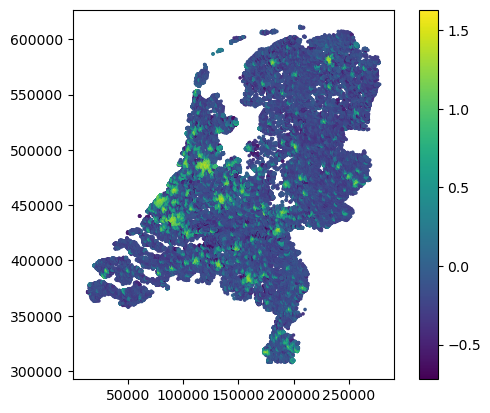

In [ ]:
area_name = "NL"
coord_system = 28992  # Meters

input_file_final_score = rf"output/final_scores/final_scores_{area_name}_{coord_system}.gpkg"
output_file_final_score_weighted = rf"output/final_scores/final_scores_weighted_{area_name}_{coord_system}.gpkg"

final_score_gdf = gpd.read_file(input_file_final_score, layer='final_scores')

final_score_weighted_gdf = final_score_gdf.copy()


weights_df = pd.DataFrame.from_dict(weights, orient='index', columns=['coefficient'])
weights_df['coefficient_abs'] = weights_df['coefficient'].abs()
weights_df['weights'] = weights_df['coefficient_abs'] / weights_df['coefficient_abs'].max()
print(weights_df)

print(weights_df['weights'].loc['norm_walkability'])

final_score_weighted_gdf['sum_score'] = 0
for variable in weights:
    final_score_weighted_gdf[variable] = final_score_weighted_gdf[variable] * weights_df['weights'].loc[variable]
    final_score_weighted_gdf['sum_score'] = final_score_weighted_gdf['sum_score'] + final_score_weighted_gdf[variable]

final_score_weighted_gdf.plot(column='sum_score', markersize=2.5, legend=True)

if os.path.exists(output_file):
    os.remove(output_file)

final_scores_gdf.to_file(output_file, layer="final_scores", driver="GPKG", mode="a")